In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('cleaned_electronics_dataset.csv')
df


,product_id,name,brand,main_category,sub_category,product_category,discount_price,actual_price,competitor_price,stock_availability,ratings,no_of_ratings,discount_percentage,price_diff_vs_competitor,price_diff_percentage
0,1,"Redmi 10 Power (Power Black, 8Gb Ram, 128Gb St...",Redmi,"Tv, Audio & Cameras",All Electronics,All,10999.0,18999.0,18716.74,In Stock,4.0,965,42.11,7717.74,41.23
1,2,"Oneplus Nord Ce 2 Lite 5G (Blue Tide, 6Gb Ram,...",Oneplus,"Tv, Audio & Cameras",All Electronics,All,18999.0,19999.0,20598.47,In Stock,4.3,113956,5.00,1599.47,7.76
2,3,Oneplus Bullets Z2 Bluetooth Wireless In Ear E...,Oneplus,"Tv, Audio & Cameras",All Electronics,All,1999.0,2299.0,2138.26,In Stock,4.2,90304,13.05,139.26,6.51
3,4,"Samsung Galaxy M33 5G (Mystique Green, 6Gb, 12...",Samsung,"Tv, Audio & Cameras",All Electronics,All,15999.0,24999.0,23568.75,In Stock,4.1,24863,36.00,7569.75,32.12
4,5,"Oneplus Nord Ce 2 Lite 5G (Black Dusk, 6Gb Ram...",Oneplus,"Tv, Audio & Cameras",All Electronics,All,18999.0,19999.0,18659.97,In Stock,4.3,113956,5.00,-339.03,-1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,9596,Palay® Bts Backpack For Boys Kpop Bts Bangtan ...,Palay®,"Tv, Audio & Cameras",All Electronics,All,1710.0,2491.0,2504.60,In Stock,4.1,37,31.35,794.60,31.73
9596,9597,Moca Ipad Air 5Th Generation Case 2022 / Ipad ...,Moca,"Tv, Audio & Cameras",All Electronics,All,475.0,1999.0,2126.94,In Stock,4.2,1133,76.24,1651.94,77.67
9597,9598,Zebronics Zeb-Sound Bomb 5 Tws V5.0 Bluetooth ...,Zebronics,"Tv, Audio & Cameras",All Electronics,All,962.0,3999.0,3847.02,In Stock,3.5,3177,75.94,2885.02,74.99
9598,9599,Linqs® Original Nxp Chip | Waterproof Nfc Tag ...,Linqs®,"Tv, Audio & Cameras",All Electronics,All,400.0,1000.0,1072.59,In Stock,3.6,210,60.00,672.59,62.71


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
file_path = "cleaned_electronics_dataset.csv"  
df = pd.read_csv(file_path)


if 'discount_percentage' not in df.columns:
    df['discount_percentage'] = ((df['competitor_price'] - df['actual_price']) / df['competitor_price']) * 100


df['log_actual_price'] = np.log1p(df['actual_price'])


df['total_revenue'] = df['actual_price'] * df['no_of_ratings']


label_encoder = LabelEncoder()
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])
df['ratings_encoded'] = label_encoder.fit_transform(df['ratings'])


df = df.drop(columns=['brand', 'ratings'])


print(df.head())


   product_id                                               name  \
0           1  Redmi 10 Power (Power Black, 8Gb Ram, 128Gb St...   
1           2  Oneplus Nord Ce 2 Lite 5G (Blue Tide, 6Gb Ram,...   
2           3  Oneplus Bullets Z2 Bluetooth Wireless In Ear E...   
3           4  Samsung Galaxy M33 5G (Mystique Green, 6Gb, 12...   
4           5  Oneplus Nord Ce 2 Lite 5G (Black Dusk, 6Gb Ram...   

         main_category     sub_category product_category  discount_price  \
0  Tv, Audio & Cameras  All Electronics              All         10999.0   
1  Tv, Audio & Cameras  All Electronics              All         18999.0   
2  Tv, Audio & Cameras  All Electronics              All          1999.0   
3  Tv, Audio & Cameras  All Electronics              All         15999.0   
4  Tv, Audio & Cameras  All Electronics              All         18999.0   

   actual_price  competitor_price stock_availability  no_of_ratings  \
0       18999.0          18716.74           In Stock           

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cleaned_electronics_dataset.csv')

print("Available Columns:", df.columns)

if 'no_of_ratings' in df.columns:
    df.rename(columns={'no_of_ratings': 'quantity_sold'}, inplace=True)

if 'stock_availability' in df.columns:
    df['stock_availability'] = pd.to_numeric(df['stock_availability'], errors='coerce').fillna(0)

missing_columns = {'quantity_sold', 'original_price', 'date'} - set(df.columns)
if missing_columns:
    print("⚠ Missing Columns:", missing_columns)

for col in missing_columns:
    df[col] = 0

df['discount_percentage'] = ((df['original_price'] - df['actual_price']) / df['original_price'].replace(0, np.nan)) * 100
df['log_actual_price'] = np.log1p(df['actual_price'])
df['total_revenue'] = df['actual_price'] * df['quantity_sold']
df['low_stock'] = np.where(df['stock_availability'] < 10, 1, 0)
df['price_elasticity'] = df['quantity_sold'] / df['actual_price'].replace(0, np.nan)
df['demand_fluctuation'] = df['quantity_sold'].pct_change().fillna(0)

if 'competitor_price' in df.columns:
    df['price_difference'] = df['actual_price'] - df['competitor_price'].fillna(df['actual_price'])
else:
    df['price_difference'] = np.nan

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month.fillna(0).astype(int)
else:
    df['month'] = 0

label_encoder = LabelEncoder()
df['brand_encoded'] = label_encoder.fit_transform(df['brand'].astype(str))
df['ratings_encoded'] = label_encoder.fit_transform(df['ratings'].astype(str))
df['price_category'] = pd.cut(df['actual_price'], bins=[0, 100, 500, 1000, 5000, np.inf], labels=[1, 2, 3, 4, 5])

df = df.drop(columns=['brand', 'date'], errors='ignore')

print(df.head())

Available Columns: Index(['product_id', 'name', 'brand', 'main_category', 'sub_category',
       'product_category', 'discount_price', 'actual_price',
       'competitor_price', 'stock_availability', 'ratings', 'no_of_ratings',
       'discount_percentage', 'price_diff_vs_competitor',
       'price_diff_percentage'],
      dtype='object')
⚠ Missing Columns: {'date', 'original_price'}
   product_id                                               name  \
0           1  Redmi 10 Power (Power Black, 8Gb Ram, 128Gb St...   
1           2  Oneplus Nord Ce 2 Lite 5G (Blue Tide, 6Gb Ram,...   
2           3  Oneplus Bullets Z2 Bluetooth Wireless In Ear E...   
3           4  Samsung Galaxy M33 5G (Mystique Green, 6Gb, 12...   
4           5  Oneplus Nord Ce 2 Lite 5G (Black Dusk, 6Gb Ram...   

         main_category     sub_category product_category  discount_price  \
0  Tv, Audio & Cameras  All Electronics              All         10999.0   
1  Tv, Audio & Cameras  All Electronics             

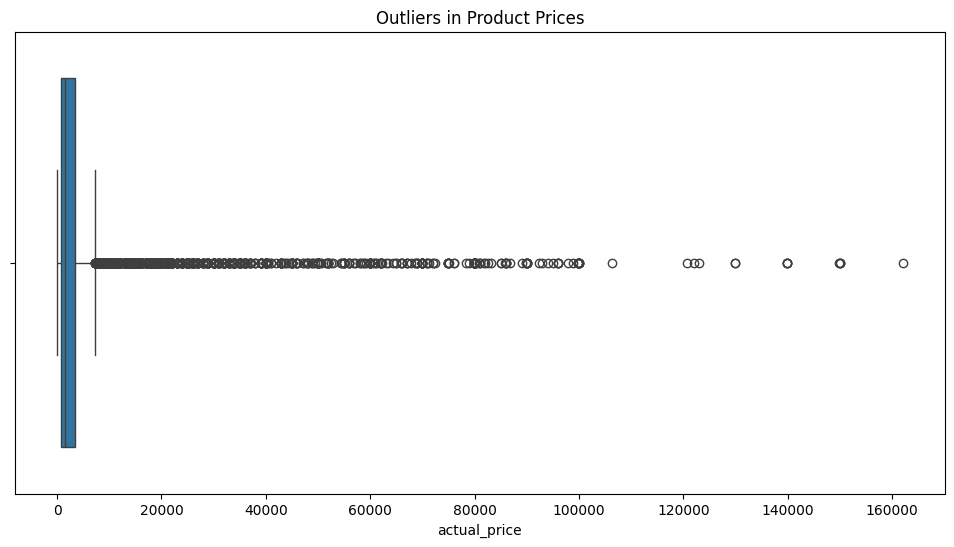

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Boxplot to Detect Outliers in Product Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['actual_price'])
plt.title("Outliers in Product Prices")
plt.show()


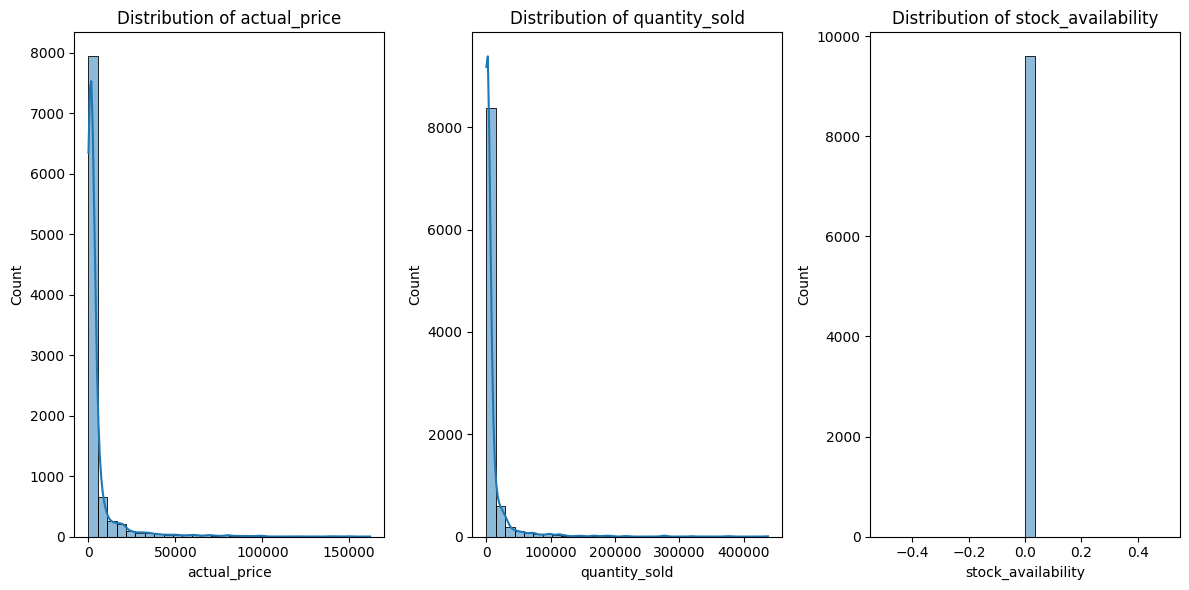

In [8]:
numerical_features = ['actual_price', 'quantity_sold', 'stock_availability']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

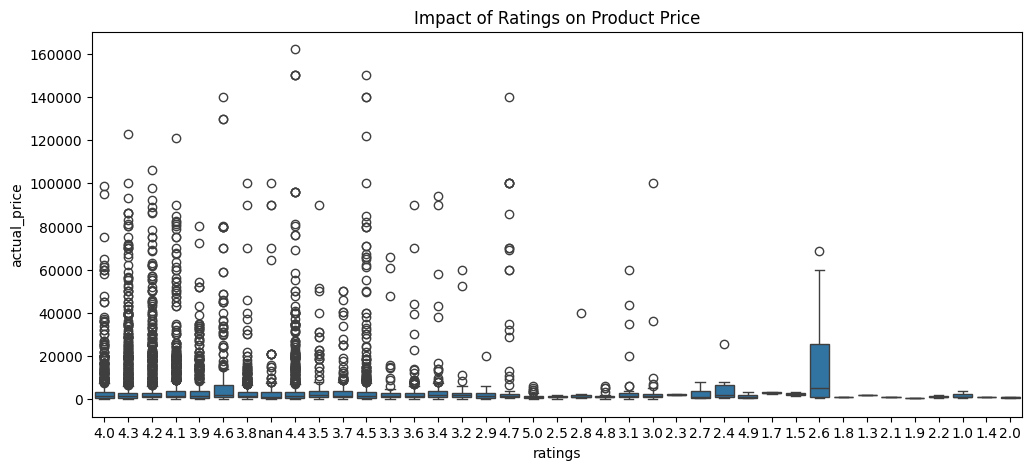

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df['ratings'] = df['ratings'].astype(str)  

df = df[['ratings', 'actual_price']].dropna()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['ratings'], y=df['actual_price'])
plt.title("Impact of Ratings on Product Price")
plt.show()

In [10]:
#pricee prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["discount_price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} RMSE: {rmse}")


Linear Regression RMSE: 2345.3367723049914
Random Forest Regressor RMSE: 1715.0893278582787


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("cleaned_electronics_dataset.csv")

imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["discount_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Linear Regression RMSE: {rmse}")

preds_binary = np.round(preds)
y_test_binary = np.round(y_test)

accuracy = accuracy_score(y_test_binary, preds_binary)
precision = precision_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
recall = recall_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
f1 = f1_score(y_test_binary, preds_binary, average='weighted', zero_division=1)

print(f"Linear Regression Accuracy: {accuracy}")
print(f"Linear Regression Precision: {precision}")
print(f"Linear Regression Recall: {recall}")
print(f"Linear Regression F1 Score: {f1}")


Linear Regression RMSE: 2345.3367723049914
Linear Regression Accuracy: 0.0015625
Linear Regression Precision: 0.6509722222222223
Linear Regression Recall: 0.0015625
Linear Regression F1 Score: 0.0021295262896825397


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv("cleaned_electronics_dataset.csv")

imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["discount_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Random Forest Regressor RMSE: {rmse}")

preds_binary = np.round(preds)
y_test_binary = np.round(y_test)

accuracy = accuracy_score(y_test_binary, preds_binary)
precision = precision_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
recall = recall_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
f1 = f1_score(y_test_binary, preds_binary, average='weighted', zero_division=1)

print(f"Random Forest Regressor Accuracy: {accuracy}")
print(f"Random Forest Regressor Precision: {precision}")
print(f"Random Forest Regressor Recall: {recall}")
print(f"Random Forest Regressor F1 Score: {f1}")


Random Forest Regressor RMSE: 1715.0893278582787
Random Forest Regressor Accuracy: 0.00625
Random Forest Regressor Precision: 0.4819444444444444
Random Forest Regressor Recall: 0.00625
Random Forest Regressor F1 Score: 0.009250660212446575


In [ ]:
#stock availability prediction classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("cleaned_electronics_dataset.csv")

imputer = SimpleImputer(strategy="median")
num_cols = ["actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category", "stock_availability"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["stock_availability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc}")


Logistic Regression Accuracy: 0.9932291666666667
Random Forest Classifier Accuracy: 1.0


In [ ]:
#logistic regression to find stock availability prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("cleaned_electronics_dataset.csv")

imputer = SimpleImputer(strategy="most_frequent")
num_cols = ["actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category", "stock_availability"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["stock_availability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted', zero_division=1)
recall = recall_score(y_test, preds, average='weighted', zero_division=1)
f1 = f1_score(y_test, preds, average='weighted', zero_division=1)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Precision: {precision}")
print(f"Logistic Regression Recall: {recall}")
print(f"Logistic Regression F1 Score: {f1}")



Logistic Regression Accuracy: 0.9932291666666667
Logistic Regression Precision: 0.9932750108506946
Logistic Regression Recall: 0.9932291666666667
Logistic Regression F1 Score: 0.9898552499782249


In [ ]:
#random forest algorithm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
num_cols = ["actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category", "stock_availability"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["stock_availability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted', zero_division=1)
recall = recall_score(y_test, preds, average='weighted', zero_division=1)
f1 = f1_score(y_test, preds, average='weighted', zero_division=1)

print(f"Random Forest Classifier Accuracy: {accuracy}")
print(f"Random Forest Classifier Precision: {precision}")
print(f"Random Forest Classifier Recall: {recall}")
print(f"Random Forest Classifier F1 Score: {f1}")


Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Precision: 1.0
Random Forest Classifier Recall: 1.0
Random Forest Classifier F1 Score: 1.0


In [8]:
#rating prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
num_cols = ["actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["ratings"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} RMSE (Ratings): {rmse}")


Linear Regression RMSE (Ratings): 0.3741471255339004
Random Forest Regressor RMSE (Ratings): 0.3304576183113351


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["ratings"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Convert predictions to categorical labels
preds_binary = np.round(preds)
y_test_binary = np.round(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
accuracy = accuracy_score(y_test_binary, preds_binary)
precision = precision_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
recall = recall_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
f1 = f1_score(y_test_binary, preds_binary, average='weighted', zero_division=1)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression Accuracy: {accuracy}")
print(f"Linear Regression Precision: {precision}")
print(f"Linear Regression Recall: {recall}")
print(f"Linear Regression F1 Score: {f1}")

Linear Regression RMSE: 0.3741471255339004
Linear Regression Accuracy: 0.896875
Linear Regression Precision: 0.9075097656250001
Linear Regression Recall: 0.896875
Linear Regression F1 Score: 0.8481157331136738


In [19]:
#Random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.nan_to_num(X)

y = df["ratings"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Convert predictions to categorical labels
preds_binary = np.round(preds)
y_test_binary = np.round(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
accuracy = accuracy_score(y_test_binary, preds_binary)
precision = precision_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
recall = recall_score(y_test_binary, preds_binary, average='weighted', zero_division=1)
f1 = f1_score(y_test_binary, preds_binary, average='weighted', zero_division=1)

print(f"Random Forest Regressor RMSE: {rmse}")
print(f"Random Forest Regressor Accuracy: {accuracy}")
print(f"Random Forest Regressor Precision: {precision}")
print(f"Random Forest Regressor Recall: {recall}")
print(f"Random Forest Regressor F1 Score: {f1}")


Random Forest Regressor RMSE: 0.3304576183113351
Random Forest Regressor Accuracy: 0.9041666666666667
Random Forest Regressor Precision: 0.8761294640979446
Random Forest Regressor Recall: 0.9041666666666667
Random Forest Regressor F1 Score: 0.8735994921663467


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
try:
    from xgboost import XGBRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    xgboost_available = True
    lightgbm_available = True
    catboost_available = True
except ImportError:
    xgboost_available = False
    lightgbm_available = False
    catboost_available = False
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("cleaned_electronics_dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy="median")
num_cols = ["discount_price", "actual_price", "competitor_price", "ratings", "no_of_ratings"]
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["brand", "main_category", "sub_category", "product_category"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
features = ["brand", "main_category", "sub_category", "actual_price", "competitor_price", "no_of_ratings"]
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df["discount_price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

if xgboost_available:
    models["XGBoost"] = XGBRegressor(objective='reg:squarederror', n_estimators=100)
if lightgbm_available:
    models["LightGBM"] = LGBMRegressor(n_estimators=100)
if catboost_available:
    models["CatBoost"] = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0)

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} RMSE: {rmse}")

# ARIMA Model (Time Series Forecasting)
arima_order = (5,1,0)  # Example order, tune as needed
arima_model = ARIMA(y, order=arima_order)
arima_result = arima_model.fit()
preds_arima = arima_result.forecast(steps=len(y_test))
rmse_arima = np.sqrt(mean_squared_error(y_test, preds_arima[:len(y_test)]))
print(f"ARIMA RMSE: {rmse_arima}")

# LSTM Model (Deep Learning)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)
preds_lstm = model_lstm.predict(X_test_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, preds_lstm))
print(f"LSTM RMSE: {rmse_lstm}")


Linear Regression RMSE: 2346.6618106644605
Ridge Regression RMSE: 2346.656381898176
Lasso Regression RMSE: 2346.5302646146947


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+10, tolerance: 6.242e+07
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor RMSE: 1742.8299196240466
ARIMA RMSE: 9246.050894165115


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 77440744.0000
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 75421392.0000
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 29022164.0000
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 27062372.0000
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 15494197.0000
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12650996.0000
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11487832.0000
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12737316.0000
Epoch 9/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 13710896.0000
Epoch 10/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 15035538.0000
Epoch 11/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12001211.0000
Epoch 12/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 13695076.0000
Epoch 13/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 14101189.0000
Epoch 14/20
480/480 ━━━━━━━━━━━━━━